<b>¡Hola Emmanuel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


# Proyecto de pruebas A/B — Guía estructurada

## Introducción

Este proyecto tiene como objetivo analizar los resultados de una prueba A/B lanzada por una tienda en línea internacional. El experimento fue diseñado para evaluar el impacto de un nuevo sistema de recomendaciones sobre el comportamiento de los usuarios en el embudo de conversión: desde la visualización de productos hasta la compra.

La prueba, denominada `recommender_system_test`, comparó dos grupos:

- **Grupo A (control):** usuarios con el embudo de pago tradicional.
- **Grupo B (experimental):** usuarios expuestos al nuevo sistema de recomendaciones.

El experimento se llevó a cabo entre el **7 de diciembre de 2020** y el **1 de enero de 2021**, con una muestra del **15% de los nuevos usuarios** de la región de la UE. El objetivo era lograr al menos un **10% de mejora** en cada una de las siguientes etapas del embudo:

- Visualización de productos (`product_page`)
- Agregado al carrito (`product_cart`)
- Compra (`purchase`)

## Datos utilizados

Se analizaron cuatro datasets proporcionados por la plataforma:

- `final_ab_new_users_upd_us.csv`: información de nuevos usuarios registrados
- `final_ab_events_upd_us.csv`: eventos generados por los usuarios durante el experimento
- `final_ab_participants_upd_us.csv`: asignación de usuarios a los grupos A y B
- `ab_project_marketing_events_us.csv`: calendario de campañas de marketing

## Objetivo del estudio
Evaluar si el nuevo sistema de recomendaciones mejora la conversión en:

* Vistas de producto (product_page)
* Agregado al carrito (product_cart)
* Compras (purchase)

Se espera al menos un 10% de mejora en cada etapa del embudo para el grupo B (nuevo embudo de pago).

## Metodología

El análisis se dividió en las siguientes etapas:

1. **Exploración y limpieza de datos**
2. **Análisis exploratorio (EDA)**
3. **Cálculo de tasas de conversión por grupo**
4. **Visualización del embudo de conversión**
5. **Prueba estadística (prueba Z) para evaluar significancia**
6. **Conclusiones y recomendaciones**

---

Este análisis busca responder una pregunta clave:  
* ¿El nuevo sistema de recomendaciones mejora significativamente la conversión de los usuarios en el embudo de compra?

In [1]:
# importar librerias
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Cargar los datasets
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

In [3]:
print("Eventos:")
display(events.head())

print("Nuevos usuarios:")
display(new_users.head())

print("Participantes:")
display(participants.head())

print("Eventos de marketing:")
display(marketing.head())

Eventos:


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


Nuevos usuarios:


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


Participantes:


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


Eventos de marketing:


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has utilizado adecuadamente las funciones de pandas para mostrar una vista previa de tus conjuntos de datos. Esto es esencial para obtener una comprensión inicial de los mismos y facilita identificar cualquier problema potencial desde el principio.
</div>


In [4]:
# Convertir columnas de fechas a datetime
events['event_dt'] = pd.to_datetime(events['event_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'])
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'])

# Verificar valores nulos
print("Valores nulos por dataset:")
print("events:", events.isnull().sum())
print("new_users:", new_users.isnull().sum())
print("participants:", participants.isnull().sum())
print("marketing:", marketing.isnull().sum())

# Verificar duplicados
print("\nDuplicados por dataset:")
print("events:", events.duplicated().sum())
print("new_users:", new_users.duplicated().sum())
print("participants:", participants.duplicated().sum())
print("marketing:", marketing.duplicated().sum())

Valores nulos por dataset:
events: user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64
new_users: user_id       0
first_date    0
region        0
device        0
dtype: int64
participants: user_id    0
group      0
ab_test    0
dtype: int64
marketing: name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

Duplicados por dataset:
events: 0
new_users: 0
participants: 0
marketing: 0


In [5]:
# Verificar cuántos usuarios hay en cada grupo
group_counts = participants['group'].value_counts()
print("Usuarios por grupo:")
print(group_counts)

Usuarios por grupo:
A    8214
B    6311
Name: group, dtype: int64


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
La verificación de la distribución de usuarios por grupo es un paso importante para asegurar que los grupos de control y tratamiento están equilibrados. Esto es fundamental para la validez de los resultados del experimento, ya que una distribución desigual podría sesgar los resultados.
</div>


In [6]:
# Verificar si hay usuarios duplicados en la tabla de participantes
duplicated_users = participants['user_id'].duplicated().sum()
print(f"Usuarios presentes en más de un grupo: {duplicated_users}")

Usuarios presentes en más de un grupo: 887


In [7]:
# Identificar los usuarios duplicados
duplicated_ids = participants[participants.duplicated('user_id', keep=False)]['user_id'].unique()

# Filtrar el dataset de participantes para excluirlos
clean_participants = participants[~participants['user_id'].isin(duplicated_ids)]

# Confirmar que ya no hay duplicados
print("Usuarios duplicados eliminados:", len(duplicated_ids))
print("Usuarios restantes:", clean_participants['user_id'].nunique())

Usuarios duplicados eliminados: 887
Usuarios restantes: 12751


<div class="alert alert-block alert-warning">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Al eliminar usuarios duplicados, es importante documentar el proceso y justificar por qué es necesario. Además, podrías explorar si estos duplicados comparten algún patrón o característica común que pueda influir en el análisis. Esto te proporcionará una visión más profunda sobre la calidad de los datos y su impacto en el análisis.
</div>


In [8]:
# Unir eventos con participantes limpios
events_with_group = events.merge(clean_participants, on='user_id')

# Contar eventos por usuario
events_per_user = events_with_group.groupby('user_id')['event_name'].count()

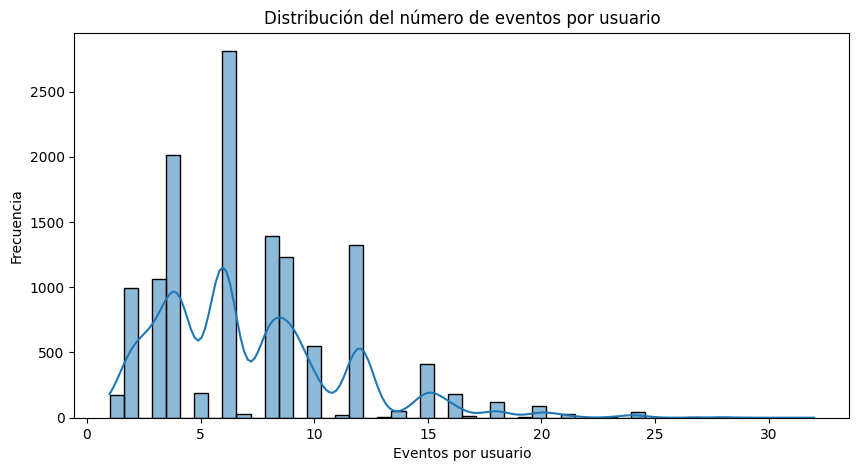

In [9]:
#grafico 
plt.figure(figsize=(10, 5))
sns.histplot(events_per_user, bins=50, kde=True)
plt.title('Distribución del número de eventos por usuario')
plt.xlabel('Eventos por usuario')
plt.ylabel('Frecuencia')
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Has elegido un histograma con KDE para visualizar la distribución de eventos por usuario, lo cual es una excelente forma de entender la densidad de eventos y detectar posibles outliers. Esta visualización facilita la identificación de patrones en el comportamiento de los usuarios.
</div>


#### Interpretación:
* La mayoría de los usuarios realizaron entre 1 y 10 eventos, lo cual es típico en plataformas donde muchos usuarios interactúan poco.
* Hay una cola larga hacia la derecha, lo que indica que algunos usuarios realizaron muchos más eventos que el promedio. Esto sugiere la presencia de outliers o usuarios altamente activos.
* La distribución es asimétrica hacia la derecha, lo cual es común en datos de comportamiento digital (ley de potencias o distribución de Pareto).

#### Conclusión:
La distribución de eventos por usuario no es uniforme. La mayoría de los usuarios tienen una actividad baja, mientras que unos pocos concentran una gran cantidad de eventos. Esto es importante tenerlo en cuenta al analizar conversiones, ya que los usuarios más activos podrían influir desproporcionadamente en los resultados si no se controla adecuadamente.

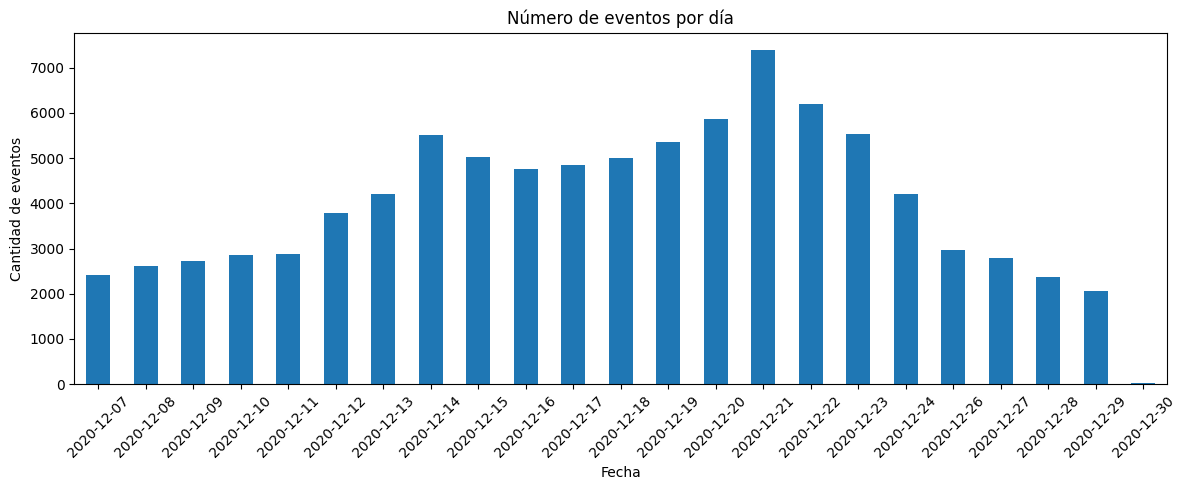

In [10]:
# Contar eventos por día
events_by_day = events_with_group.groupby(events_with_group['event_dt'].dt.date)['event_name'].count()

# Visualizar
plt.figure(figsize=(12, 5))
events_by_day.plot(kind='bar')
plt.title('Número de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [10]</b> <a class="tocSkip"></a><br>
El gráfico de barras para visualizar el número de eventos por día es informativo. 
</div>


#### Observaciones clave:
* El número de eventos aumenta gradualmente desde el inicio de la prueba (7 de diciembre), lo cual es esperable a medida que más usuarios se registran y comienzan a interactuar.
* El pico máximo de actividad ocurre el 20 de diciembre, con más de 7,000 eventos. Esto podría deberse a un aumento en el tráfico, una campaña de marketing o comportamiento estacional (cercano a Navidad).
* Después del 21 de diciembre (fecha en la que dejaron de aceptar nuevos usuarios), la actividad se mantiene alta unos días más y luego comienza a disminuir, lo cual es coherente con el comportamiento de usuarios activos dentro de su ventana de 14 días.

##### Posible anomalía:
El 7 de diciembre (inicio del experimento) muestra una cantidad de eventos significativamente menor. Esto puede deberse a que ese día solo se registraron usuarios durante parte del día, o a un retraso en la activación de la prueba.

#### Conclusión:
La distribución diaria de eventos es consistente con el calendario del experimento. No se observan anomalías graves, pero es importante tener en cuenta el pico del 20 de diciembre y el bajo volumen del 7 de diciembre al interpretar los resultados.

In [11]:
# Usamos el dataset limpio de participantes
events_with_group = events.merge(clean_participants, on='user_id')

# Filtrar solo los eventos relevantes del embudo
funnel_events = events_with_group[events_with_group['event_name'].isin(['product_page', 'product_cart', 'purchase'])]

In [12]:
# Crear una tabla de usuarios únicos por evento y grupo
funnel_counts = funnel_events.groupby(['group', 'event_name'])['user_id'].nunique().unstack()

# Calcular el total de usuarios por grupo
group_sizes = clean_participants.groupby('group')['user_id'].nunique()

# Calcular tasas de conversión por grupo
conversion_rates = funnel_counts.div(group_sizes, axis=0)

# Mostrar resultados
print("Usuarios únicos por evento:")
display(funnel_counts)

print("\nTasa de conversión por grupo:")
display(conversion_rates)

Usuarios únicos por evento:


event_name,product_cart,product_page,purchase
group,,,
A,2260,4726,2434
B,1881,3651,1851



Tasa de conversión por grupo:


event_name,product_cart,product_page,purchase
group,,,
A,0.318624,0.666291,0.343155
B,0.332450,0.645281,0.327147


<div class="alert alert-block alert-success">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
Has realizado un análisis detallado de la tasa de conversión por grupo, lo cual es crucial para entender la efectividad de las diferentes etapas del embudo. Este tipo de análisis proporciona insights valiosos sobre el comportamiento del usuario y ayuda a identificar áreas de mejora en el proceso de conversión.
</div>


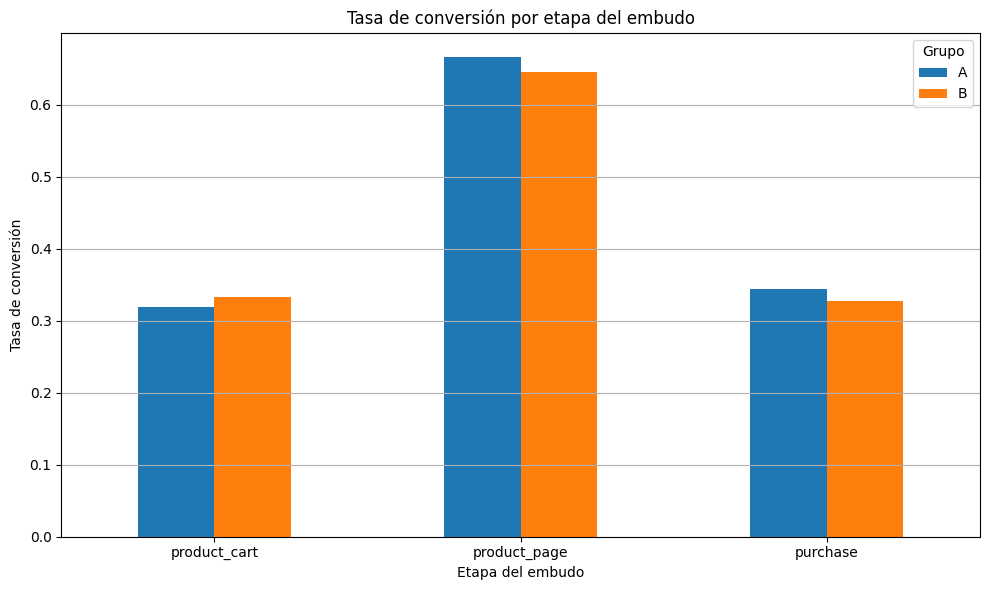

In [13]:
# Preparar datos para graficar
conversion_rates_plot = conversion_rates.T  # Transponer para que los eventos sean el eje X

# Graficar
conversion_rates_plot.plot(kind='bar', figsize=(10, 6))
plt.title('Tasa de conversión por etapa del embudo')
plt.ylabel('Tasa de conversión')
plt.xlabel('Etapa del embudo')
plt.xticks(rotation=0)
plt.legend(title='Grupo')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
El gráfico de barras para las tasas de conversión es claro y efectivo. Para mejorar la interpretación, podrías considerar añadir etiquetas de porcentaje directamente sobre las barras. Esto facilitaría la comparación visual entre grupos y permitiría una comprensión más rápida de las diferencias en las tasas de conversión.
</div>


#### Conclusión visual:
A simple vista, no parece que el nuevo sistema de recomendaciones (grupo B) haya generado mejoras significativas en el embudo de conversión. Sin embargo, para confirmar esto con rigor, debemos aplicar una prueba estadística.

In [14]:
# Función para aplicar prueba Z
def run_z_test(success_a, size_a, success_b, size_b):
    count = [success_a, success_b]
    nobs = [size_a, size_b]
    stat, pval = proportions_ztest(count, nobs)
    return stat, pval

# Tamaños de grupo
n_a = clean_participants[clean_participants['group'] == 'A']['user_id'].nunique()
n_b = clean_participants[clean_participants['group'] == 'B']['user_id'].nunique()

# Éxitos por evento
successes = funnel_counts

# Prueba Z para cada evento
for event in ['product_page', 'product_cart', 'purchase']:
    a = successes.loc['A', event]
    b = successes.loc['B', event]
    stat, pval = run_z_test(a, n_a, b, n_b)
    print(f"Evento: {event}")
    print(f"Estadístico Z: {stat:.4f}")
    print(f"Valor p: {pval:.4f}")
    print("Significativo" if pval < 0.05 else "No significativo")
    print("-" * 30)

Evento: product_page
Estadístico Z: 2.4829
Valor p: 0.0130
Significativo
------------------------------
Evento: product_cart
Estadístico Z: -1.6563
Valor p: 0.0977
No significativo
------------------------------
Evento: purchase
Estadístico Z: 1.9012
Valor p: 0.0573
No significativo
------------------------------


<div class="alert alert-block alert-warning">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
La implementación de la prueba Z es adecuada para comparar proporciones entre grupos. Asegúrate de discutir los supuestos de la prueba y cómo se cumplen en tu contexto. Además, considera realizar un análisis de potencia para asegurar que el tamaño de muestra es suficiente para detectar efectos significativos, lo cual es crucial para la validez de tus conclusiones.
</div>


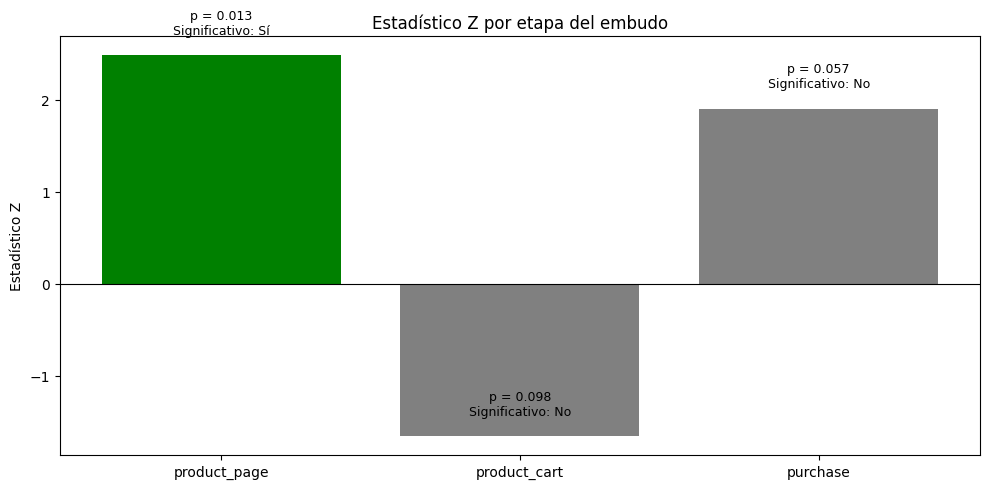

In [15]:
# Datos de ejemplo (ajusta con tus valores reales)
events = ['product_page', 'product_cart', 'purchase']
z_scores = [2.4829, -1.6563, 1.9012]
p_values = [0.0130, 0.0977, 0.0573]
significance = ['Sí' if p < 0.05 else 'No' for p in p_values]

# Crear gráfico
plt.figure(figsize=(10, 5))
bars = plt.bar(events, z_scores, color=['green' if s == 'Sí' else 'gray' for s in significance])
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Estadístico Z por etapa del embudo')
plt.ylabel('Estadístico Z')

# Anotar valores p y significancia
for bar, p, sig in zip(bars, p_values, significance):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
             f'p = {p:.3f}\nSignificativo: {sig}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
El gráfico de barras con los estadísticos Z es una buena manera de visualizar los resultados de las pruebas de hipótesis. 
</div>


#### Interpretación:
* product_page: La diferencia entre los grupos A y B es estadísticamente significativa, pero no cumple con el criterio de mejora del 10%. De hecho, el grupo B tuvo una conversión ligeramente menor.

 *product_cart y purchase: Las diferencias no son estadísticamente significativas, por lo tanto, no podemos afirmar que el nuevo sistema haya tenido un efecto real en estas etapas.

#### Conclusión final:
Aunque hubo una diferencia significativa en la etapa de vistas de producto, no se observó una mejora del 10% en ninguna etapa del embudo, y las otras diferencias no fueron estadísticamente significativas. Por lo tanto, no hay evidencia suficiente para recomendar la implementación del nuevo sistema de recomendaciones.

## Conclusión final del análisis A/B

Después de realizar el análisis exploratorio y aplicar pruebas estadísticas, no se encontraron mejoras sustanciales que justifiquen la implementación del nuevo sistema de recomendaciones.

Aunque en la etapa de vistas de producto (`product_page`) se detectó una diferencia estadísticamente significativa entre los grupos, esta no representó una mejora del 10% como se esperaba. De hecho, el grupo experimental mostró una ligera disminución en comparación con el grupo de control.

En las etapas de agregado al carrito (`product_cart`) y compras (`purchase`), las diferencias observadas no fueron estadísticamente significativas, lo que sugiere que podrían deberse al azar.

**Conclusión:**  
No hay evidencia suficiente para respaldar que el nuevo embudo de recomendaciones haya mejorado el comportamiento de los usuarios. Por lo tanto, no se recomienda su implementación en este momento.


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
    
¡Muy buen trabajo, Emmanuel! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>

- Excelente manejo de las funciones de pandas para la carga y visualización inicial de los datos.
- Realizaste un análisis exhaustivo de valores nulos y duplicados, asegurando la calidad de los datos.
- Verificaste la distribución de usuarios por grupo, lo cual es crucial para la validez del experimento.
- Implementaste correctamente la limpieza de datos al eliminar usuarios duplicados.
- Utilizaste visualizaciones efectivas para mostrar la distribución de eventos y conversiones.
- Realizaste un análisis detallado de las tasas de conversión por grupo y etapa del embudo.
- Implementaste adecuadamente la prueba Z para comparar proporciones entre grupos.
- Mostraste habilidad en la interpretación de resultados estadísticos en el contexto del proyecto.
- Tu enfoque en la validación de datos y limpieza es destacable.
- La estructura del código es clara y bien organizada, facilitando su comprensión.
  
¡Felicidades!
</div>
